In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
dat = numpy.load('d2_n4_hbonds.npy')
# dat_row = [dist_o7h4, dist_ogh4, angl_n4h4o7, angl_n4h4og]

In [3]:
dat_all = dat.reshape(-1, 4)                             # 1 path per 36 row;
dat_end = dat[:, [0,35], :].reshape(-1, 4)               # 1 path per  2 row;
dat_mid = dat[:, numpy.arange(1, 35), :].reshape(-1, 4)  # 1 path per 34 row;
dat_all.shape

(18000, 4)

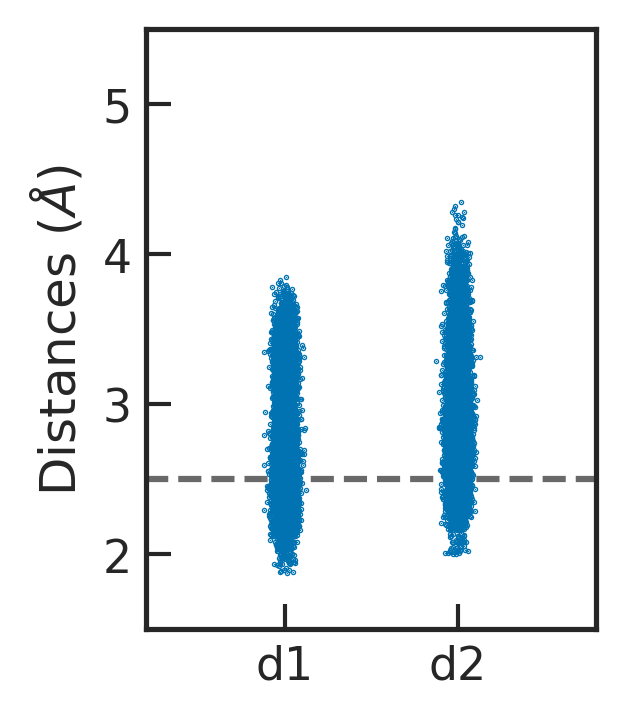

In [4]:
fig, ax,  = plt.subplots(figsize=(3., 4.), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./3., right=2.5/3., top=3.5/4., bottom=1.5/4.)

# ===
y_d1 = numpy.arange(6)
edge_label=['d1', 'd2']

# ===
ax.plot( [-1, 2],[2.5, 2.5], c='dimgrey', ls='--', zorder=0)

for i in range(2):
    ax.scatter(y=dat_all[:, i], x=numpy.random.normal(loc=y_d1[i*1+0], scale=0.03, size=dat_all.shape[0]), s=0.1, color=sns.color_palette('colorblind')[0])
    # ax.scatter(y=dat_end[:, i], x=numpy.random.normal(loc=y_d1[i*3+1], scale=0.03, size=dat_end.shape[0]), s=0.1, color=sns.color_palette('colorblind')[1])
    # ax.scatter(y=dat_mid[:, i], x=numpy.random.normal(loc=y_d1[i*3+2], scale=0.03, size=dat_mid.shape[0]), s=0.1, color=sns.color_palette('colorblind')[2])

    
ax.set_xticks([0, 1])
ax.set_xticklabels(edge_label, ha='center', va='top', rotation=0, rotation_mode="anchor")

ax.tick_params(which='major', direction='in', length=6, width=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-0.8, 1.8)
ax.set_ylim( 1.5, 5.5)
ax.set_ylabel(r'Distances ($\AA$)')

fig.savefig('hbond_dist')
plt.show()

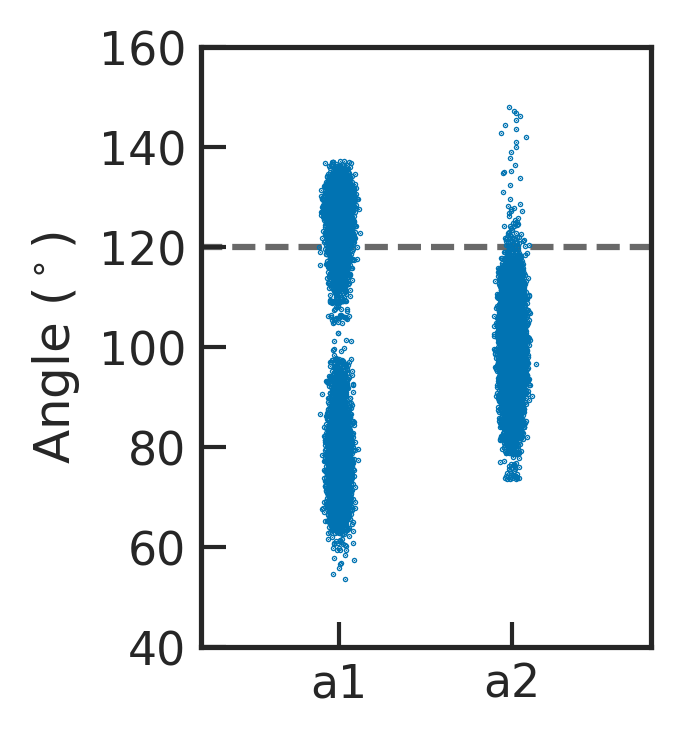

In [5]:
fig, ax,  = plt.subplots(figsize=(3., 4.), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./3., right=2.5/3., top=3.5/4., bottom=1.5/4.)

# ===
y_d1 = numpy.arange(6)
edge_label=['a1', 'a2']
# ===

ax.plot( [-1, 2],[120, 120], c='dimgrey', ls='--', zorder=0)

for i in range(2, 4):
    ax.scatter(y=dat_all[:, i], x=numpy.random.normal(loc=y_d1[i*1+0]-2, scale=0.03, size=dat_all.shape[0]), s=0.1, color=sns.color_palette('colorblind')[0])
    
ax.set_xticks([0, 1])
ax.set_xticklabels(edge_label, ha='center', va='top', rotation=0, rotation_mode="anchor")

ax.tick_params(which='major', direction='in', length=6, width=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-0.8, 1.8)
ax.set_ylim( 40, 160)
ax.set_ylabel(r'Angle ($^\circ$)')

fig.savefig('hbond_angl')
plt.show()

In [6]:
npath, nrep = dat.shape[:2]

has_hbond = [] # 0: no hbonds; 1: O7 accepted; 2:Og accepted; 3: both accepted
for ipath in range(npath):
    o7_hbond=False
    og_hbond=False
    path_hbond=0
        
    for irep in range(nrep):
        rep = dat[ipath, irep, :]
        
        if rep[0]<=2.5 and rep[2]>=120:
            o7_hbond=True
            
        if rep[1]<=2.5 and rep[3]>=120:
            og_hbond=True
    
    if o7_hbond==True:
        path_hbond=1
    
    if og_hbond==True:
        path_hbond=2 if o7_hbond==False else 3
    
    has_hbond.append(path_hbond)
has_hbond = numpy.asarray(has_hbond)
print(has_hbond)

[1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 3 1 2 1 0
 2 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 2 0 1 1 0 1 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 0 3 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 2 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0
 2 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 3 1 1 0 0 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 2 1 1 1 1 1 

In [7]:
print('  no hbond:', has_hbond[has_hbond==0].shape)
print('  o7 hbond:', has_hbond[has_hbond==1].shape)
print('  og hbond:', has_hbond[has_hbond==2].shape)
print('both hbond:', has_hbond[has_hbond==3].shape)
has_hbond = has_hbond.reshape(20, 25)
print(has_hbond.shape)

  no hbond: (164,)
  o7 hbond: (327,)
  og hbond: (6,)
both hbond: (3,)
(20, 25)


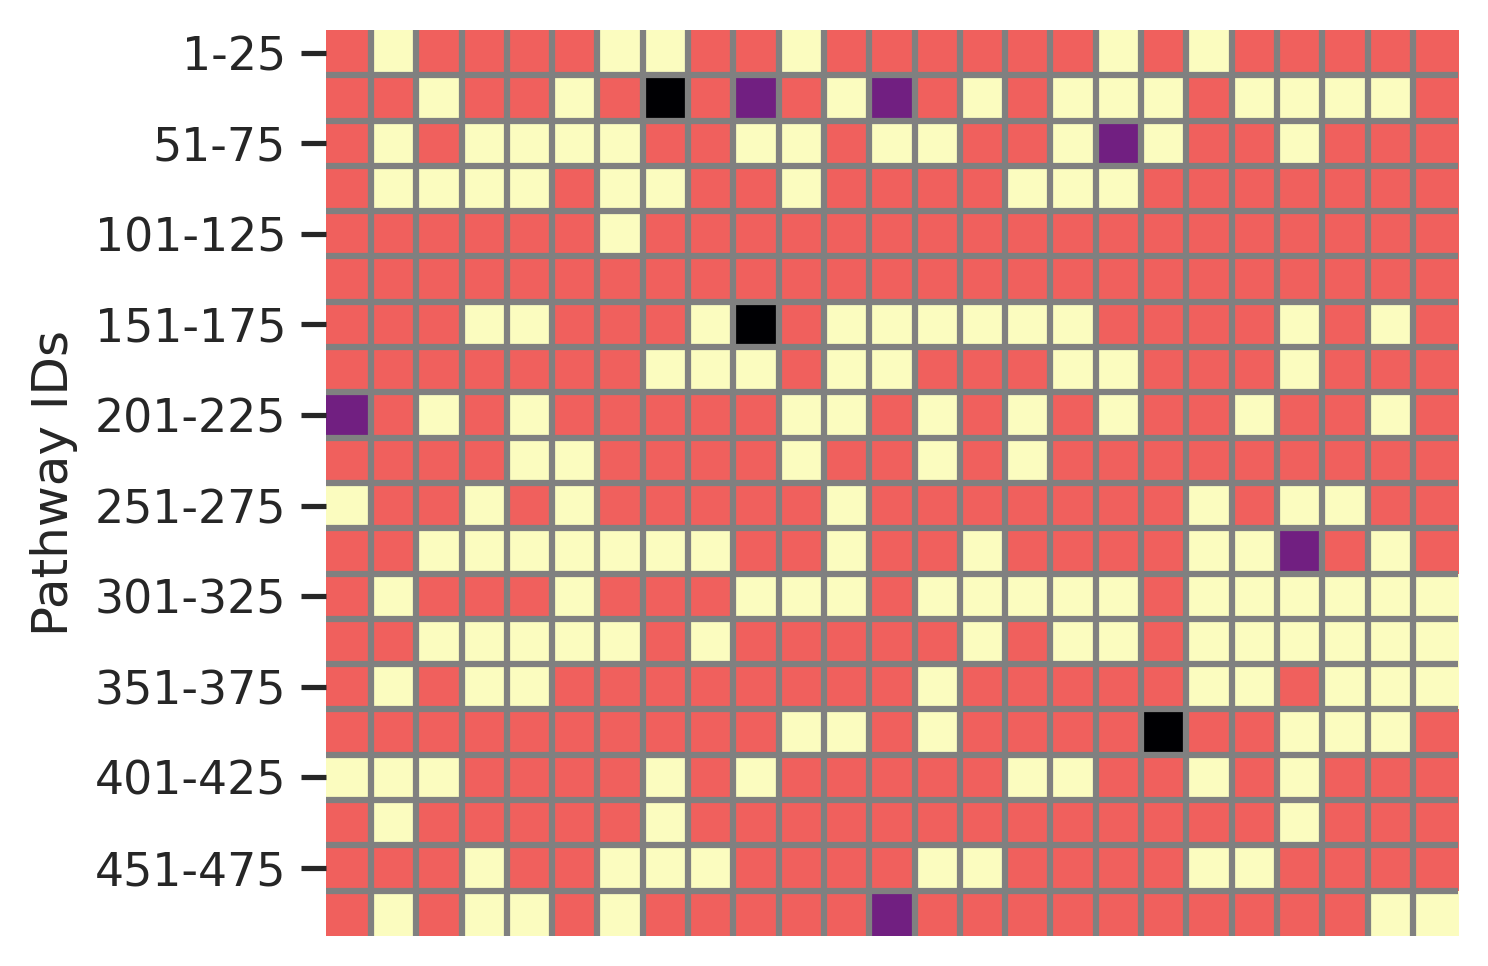

In [9]:
from matplotlib.ticker import FixedLocator, FixedFormatter

fig, ax,  = plt.subplots(figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k', )
im = ax.imshow(has_hbond, cmap='magma_r')

ylabel = [f"{i*50+1}-{i*50+25}" for i in range(10)]
ax.set_yticks(numpy.arange(has_hbond.shape[0]/2)*2)
ax.set_xticks([])
ax.set_yticklabels(ylabel)
ax.xaxis.set_tick_params(which='minor', bottom=False)

ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
ax.spines[:].set_visible(False)

x_locator = FixedLocator([i-0.5 for i in range(1,25)])
y_locator = FixedLocator([i-0.5 for i in range(1,20)])
ax.yaxis.set_minor_locator(y_locator)
ax.xaxis.set_minor_locator(x_locator)

ax.grid(which="minor", color="gray", linestyle='-', linewidth=1.5)
ax.tick_params(which="minor", bottom=False, left=False)

ax.set_ylabel('Pathway IDs')

fig.savefig('hbond_path')
plt.show()